# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's look at our data.

In [2]:
boston_df = pd.read_csv("../data/boston airbnb data/listings.csv")

In [3]:
boston_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
boston_df.shape

(3585, 95)

So our dataset has total 3585 samples and 95 features. There are quite a few features.

# Questions

**Question 1** : How much does location contribute to the popularity of listings?

There might be several factors related to locations that make certain listings popular over others :
1. street, city, state of listing
2. transportation
3. neighbourhood
4. location of the host

First we will select the columns related to location informations only and then look at them one by one.

In [5]:
boston_location_df = boston_df[['transit', 'host_location', 'host_neighbourhood', 'street',
                                'neighbourhood', 'neighbourhood_cleansed', 'zipcode', 'calculated_host_listings_count',
                                'neighbourhood_group_cleansed', 'city', 'state', 'smart_location',
                                'latitude', 'longitude', 'is_location_exact', 'review_scores_location']]

First check how many of these columns have **NULL** values.

In [6]:
boston_location_df.isnull().sum().sort_values()

street                               0
neighbourhood_cleansed               0
calculated_host_listings_count       0
state                                0
smart_location                       0
latitude                             0
longitude                            0
is_location_exact                    0
city                                 2
host_location                       11
zipcode                             38
host_neighbourhood                 339
neighbourhood                      543
review_scores_location             822
transit                           1290
neighbourhood_group_cleansed      3585
dtype: int64

The **'neighbourhood_group_cleansed'** column has all NULL values. Let's drop it.

In [7]:
boston_location_df.drop('neighbourhood_group_cleansed', axis=1, inplace=True)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Let's start with the neighbourhood columns.

In [8]:
boston_location_df['neighbourhood_cleansed'].value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [9]:
boston_location_df['neighbourhood'].value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Financial District     13
Somerville             13
Brookline               8
Leather District        8
Downtown                8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

They look quite similar. To get a clearer idea, let's compare elementwise.

In [10]:
boston_location_df['neighbourhood_cleansed'].eq(boston_location_df['neighbourhood']).value_counts()

True     2123
False    1462
dtype: int64

So the two columns have 2123 values in common. But there are also 1462 entries which donot agree. 
Let's try to understand possible sources of dissimilarity.

The 'neighborhood' column has total 543 NULL values whereas 'neighbourhood_cleansed' has no NULL value. This is one source of dissimilarity.

In [11]:
boston_location_df['neighbourhood_cleansed'].eq(boston_location_df['neighbourhood'])

0        True
1        True
2        True
3       False
4        True
        ...  
3580    False
3581    False
3582    False
3583    False
3584    False
Length: 3585, dtype: bool

In [12]:
boston_location_df[['neighbourhood', 'neighbourhood_cleansed']].tail(10)

,neighbourhood,neighbourhood_cleansed
3575,Somerville,Charlestown
3576,Cambridge,Allston
3577,Brookline,Allston
3578,NaN,Allston
3579,Brookline,Allston
3580,Somerville,Charlestown
3581,NaN,Allston
3582,NaN,Charlestown
3583,Somerville,Charlestown
3584,Somerville,Charlestown


Another point of dissimilarity arises when entries are actually different in the two columns. But interesting thing to note here is that even they are different, they represent two adjacent neighborhoods (google search!). That means we can proceed with one of them and drop the other one. Let's keep the **'neighbourhood_cleansed'** column since it has no NULL value and drop the other one.

In [13]:
boston_location_df.drop('neighbourhood', axis=1, inplace=True)

In [14]:
boston_location_df[['host_neighbourhood', 'host_location']].head(10)

,host_neighbourhood,host_location
0,Roslindale,"Boston, Massachusetts, United States"
1,Roslindale,"Boston, Massachusetts, United States"
2,Roslindale,"Boston, Massachusetts, United States"
3,NaN,"Boston, Massachusetts, United States"
4,Roslindale,"Boston, Massachusetts, United States"
5,Roslindale,"Boston, Massachusetts, United States"
6,Roslindale,"Milton, Massachusetts, United States"
7,Roslindale,"Boston, Massachusetts, United States"
8,Roslindale,"Boston, Massachusetts, United States"
9,Roslindale,"Boston, Massachusetts, United States"


Both the columns have the same information. One contains only neighborhood names and the other has informations about host's city, state and country. We can use host's location information to determine if the host is local or not. Knowing either of these should be suffice for that purpose. We have already seen that 'host_location' has fewer NULL values as compared to 'host_neighbouhood'. Let's look at these columns a bit closer.

In [15]:
boston_location_df['host_location'].unique()

array(['Boston, Massachusetts, United States',
       'Milton, Massachusetts, United States',
       'Roslindale (part of Boston), MA',
       'Boston Massachusetts, Roslindale Neighborhood', 'US',
       'Upton, Massachusetts, United States',
       'Cambridge, Massachusetts, United States',
       'Belo Horizonte, State of Minas Gerais, Brazil',
       'Brookline, Massachusetts, United States',
       'St. Johnsbury, Vermont, United States',
       'Massachusetts, United States', 'Miami, Florida, United States',
       'Seattle, Washington, United States',
       'San Isidro, Buenos Aires Province, Argentina',
       'Chicago, Illinois, United States',
       'Hingham, Massachusetts, United States',
       'Atlanta, Georgia, United States',
       "Avignon, Provence-Alpes-Côte d'Azur, France",
       'San Miguel de Allende, Guanajuato, Mexico',
       'Jaffrey, New Hampshire, United States', nan,
       'Washington, District of Columbia, United States',
       'Manchester-by-the-Sea,

In [16]:
boston_location_df['host_neighbourhood'].unique()

array(['Roslindale', nan, 'Jamaica Plain', 'Hyde Park', 'South Beach',
       'Benton Park', 'Back Bay', 'Mission Hill', 'Cambridge',
       'Fenway/Kenmore', 'Beacon Hill', 'West End', 'North End',
       'Allston-Brighton', 'Upper East Side', 'Theater District',
       'Leather District', 'Gay Village', 'Somerville', 'Chinatown',
       'Santa Cruz', 'Central Business District', 'South Boston',
       'Financial District', 'Medford', 'Downtown Crossing', 'Downtown',
       'Roxbury', 'South End', 'Dorchester', 'Mattapan',
       'Coolidge Corner', 'Los Altos Hills', 'Harvard Square',
       'East Boston', 'Malden', 'Charlestown', 'Newton', 'Chelsea',
       'Bernal Heights', 'Government Center', 'Sunnyvale', 'Brookline',
       'Midtown East', 'East Harlem', 'West Roxbury', 'Chestnut Hill',
       'South of Nevsky', 'Winthrop', 'Flatiron District', 'Belváros',
       'Miami Beach', 'Coral Way', 'Mission District'], dtype=object)

'host_location' is much messier as compared to 'host_neighbourhood'. One can use either of these features to determine whether the host is local or not. A local host might be prefered over remote host due to several reasons, e.g. communication, availability, realiabilty and so on. Let's engineer a new feature **'host_local'** from the available informations.

If we find the term 'boston' in host_location, we will mark the host as local. To avoid any case sensitivity, let's us first convert to all lower cases.

In [17]:
boston_location_df['host_location'] = boston_location_df['host_location'].apply(lambda x:str(x).lower())

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
def identify_local_host(text) :
    
    if 'boston' in text:
        return 1
    else:
        return 0

In [19]:
boston_location_df['host_local'] = boston_location_df['host_location'].apply(identify_local_host)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
boston_location_df['host_local'].value_counts()

1    2431
0    1154
Name: host_local, dtype: int64

We can now drop the columns 'host_location' and 'host_neighbourhood' because we have encrypted them in our new feature 'host_local'.

In [21]:
boston_location_df.drop(['host_location', 'host_neighbourhood'], axis=1, inplace=True)

In [22]:
boston_location_df[['street', 'state', 'city', 'smart_location', 'zipcode']]

,street,state,city,smart_location,zipcode
0,"Birch Street, Boston, MA 02131, United States",MA,Boston,"Boston, MA",02131
1,"Pinehurst Street, Boston, MA 02131, United States",MA,Boston,"Boston, MA",02131
2,"Ardale St., Boston, MA 02131, United States",MA,Boston,"Boston, MA",02131
3,"Boston, MA, United States",MA,Boston,"Boston, MA",NaN
4,"Durnell Avenue, Boston, MA 02131, United States",MA,Boston,"Boston, MA",02131
...,...,...,...,...,...
3580,"Washington Street, Somerville, MA 02143, Unite...",MA,Somerville,"Somerville, MA",02143
3581,"Freeman Street, Brookline, MA 02446, United St...",MA,Brookline,"Brookline, MA",02446
3582,"Child Street, Cambridge, MA 02141, United States",MA,Cambridge,"Cambridge, MA",02141
3583,"George St Somerville, Somerville, MA 02145, Un...",MA,Somerville,"Somerville, MA",02145


So we find that the 'smart_location' column is basically made up of the columns 'city' and 'state' and carries no additional information. However, we have seen that the 'city' column has 2 missing values whereas 'smart_location' has none. We can use this to fill in NULL values in the 'city' column and then can drop 'smart_location'.

In [23]:
def fill_city_value(row):
    """
    This function fills in the NULL values in one column with respect to the other column
    
    Parameters:
       row : row of a dataframe
       
    Returns:
       row : 
    
    """
    
    if pd.isna(row['city']) :
        #row['city'] = row['smart_location'].split(",")[0]
        return row['smart_location'].split(",")[0]
    else :
        return row['city']

In [24]:
boston_location_df['city'] = boston_location_df.apply(fill_city_value, axis=1)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
boston_location_df['city'].isnull().sum()

0

In [26]:
boston_location_df['state'].unique()

array(['MA'], dtype=object)

Also the 'state' column has only one value. Let's also drop this one.

In [27]:
boston_location_df.drop(['state', 'smart_location'], axis=1, inplace=True)

On the other hand although the 'street' column has the same informations about 'city', 'state', 'zipcode' and 'country', it also has an added information about the street name. But that is just a duplicate information of 'zipcode'. So we go ahead and drop the 'street' column.

In [28]:
boston_location_df.drop('street', axis=1, inplace=True)

In [29]:
boston_location_df.columns

Index(['transit', 'neighbourhood_cleansed', 'zipcode',
       'calculated_host_listings_count', 'city', 'latitude', 'longitude',
       'is_location_exact', 'review_scores_location', 'host_local'],
      dtype='object')

In [30]:
boston_location_df['city'].unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Watertown', 'Brighton',
       'Brighton ', 'Boston ', 'MA', 'West Roxbury', 'Newton',
       'Hyde Park', 'Mattapan', 'Milton', 'Dorchester',
       'dorchester, boston ', 'South Boston', 'Allston', 'ALLSTON'],
      dtype=object)

The 'city' column needs to be cleaned. First, let's convert to all lower cases and get rid of extra spaces.

In [31]:
boston_location_df['city'] = boston_location_df['city'].apply(lambda x : x.lower().strip())

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
boston_location_df['city'].unique()

array(['boston', 'roslindale', 'roslindale, boston', 'jamaica plain',
       'brookline', 'jamaica plain, boston', 'jamaica plain (boston)',
       'roxbury crossing', 'jamaica plain, ma', 'boston (jamaica plain)',
       'mission hill, boston', '波士顿', 'boston, massachusetts, us',
       'south end, boston', 'cambridge', 'east boston', 'charlestown',
       'boston (charlestown)', 'somerville', 'watertown', 'brighton',
       'ma', 'west roxbury', 'newton', 'hyde park', 'mattapan', 'milton',
       'dorchester', 'dorchester, boston', 'south boston', 'allston'],
      dtype=object)

Some of the entries have neighbouhood name associated with this. Let's first replace all entries with 'boston' in it with only 'boston'.  

In [33]:
def my_func(value) :
    
    neighbourhood_list = ['roslindale', 'allston', 'jamaica plain', 'east boston', 'charlestown','south boston',
                           'dorchester', 'hyde park', 'roxbury crossing', 'west roxbury', 'mattapan', 'jamaica plain, ma']
    
    if (('boston' in value) or ('(boston)' in value)) :
        return 'boston'
    elif value in neighbourhood_list:
        return 'boston'
    else :
        return value

In [34]:
boston_location_df['city'] = boston_location_df['city'].apply(my_func)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
boston_location_df['city'].unique()

array(['boston', 'brookline', '波士顿', 'cambridge', 'somerville',
       'watertown', 'brighton', 'ma', 'newton', 'milton'], dtype=object)

In [36]:
boston_location_df['city'].value_counts()

boston        3510
somerville      19
brookline       18
brighton        16
cambridge       16
ma               2
milton           1
watertown        1
newton           1
波士顿              1
Name: city, dtype: int64

Since we are analysing the data of Boston city only, let's consider only the rows corrsponding to Boston and then drop the 'city' column.

In [37]:
boston_location_df = boston_location_df[boston_location_df['city']=='boston']
boston_location_df.shape

(3510, 10)

In [38]:
boston_location_df.drop('city', axis=1, inplace=True)

Let's now look at the first few entries in the 'transit' column.

In [39]:
for text in boston_location_df['transit'].values[:5]:
    print(text)
    print('\n')

The bus stop is 2 blocks away, and frequent. Bus is about a 10 minute ride to the Orange line, forest hills. The commuter rail into down town is a 6 minute walk from our home.  Walking is pleasant and restaurants, shops and grocery store are all a 6 minute walk away.


Plenty of safe street parking. Bus stops a few hundred feet from home. Buses 35, 36, or 37 will take you to the Forest Hills subway station is approximately 10 minutes. The buses are frequent during the week, less frequent during the weekend. However, many more buses leave Roslindale Sq., which is just 5 minutes away. Commuter rail is also down the road: more expensive but will take you downtown (Copley and South Station) in less than 20 minutes. Does not run on Sundays. The station is Roslindale Village on the Needham Heights line.


PUBLIC TRANSPORTATION: From the house, quick public transportation to Forest Hills station (Orange Line and Commuter Rail) is via two nearby MBTA bus lines. The #38 bus stops one-half block

Although this column has important informations regarding transportations available at the listing place, contents are very messy and require a lot of processing in order to get meaningful information out of it. We will just drop it.

In [40]:
boston_location_df.drop('transit', axis=1, inplace=True)

In [41]:
boston_location_df['review_scores_location'].isnull().sum()

784

We are here trying to see which location parameters are important from the perspective of 'review_scores_location' and therefore we can think of it as our target column. In that case, we can drop rows where this target column has NULL values.

In [42]:
boston_location_df.dropna(subset=['review_scores_location'], inplace=True)

In [43]:
boston_location_df.shape, boston_location_df['review_scores_location'].isnull().sum()

((2726, 8), 0)

In [44]:
boston_location_df['review_scores_location'].value_counts()

10.0    1604
9.0      811
8.0      232
7.0       43
6.0       17
4.0        9
5.0        5
2.0        4
3.0        1
Name: review_scores_location, dtype: int64

'review_scores_location' have 9 different values. Our goal is to find out which locations have better review scores over others. For this purpose, we really donot need to handle all these 9 different values individually. Rather we can form groups according to the following prescription :

1. 'low ' : scores in the range [1,5)
2. 'average' : scores in the range [5,7]
3. 'high' : score in the range [8,10]

Let's create another column which will describe which of the above group a particular score belongs to.

In [45]:
def value_to_group(value) :
    """
    Replace an input value with a group according to the following assignment:
    
    'low' : for value in the range [1,5)
    'average' : for value in the range [5,7]
    'high' : for value in the range [8,10]
    
    Parameter :
      Value (float) : the input number
      
    Returns :
      group : the group to which the 'value' belongs
    
    """
    
    if (value <5.):
        return 'low'
    elif (value >=5. and value <=7.):
        return 'average'
    else:
        return 'high'

In [46]:
boston_location_df['review_groups_location'] = boston_location_df['review_scores_location'].apply(value_to_group)

In [47]:
boston_location_df['review_groups_location'].value_counts()

high       2647
average      65
low          14
Name: review_groups_location, dtype: int64

Note that most of the review scores are on the higher side. 

In [48]:
boston_location_df.columns

Index(['neighbourhood_cleansed', 'zipcode', 'calculated_host_listings_count',
       'latitude', 'longitude', 'is_location_exact', 'review_scores_location',
       'host_local', 'review_groups_location'],
      dtype='object')

In [49]:
boston_location_df.groupby('review_groups_location').get_group('low')['neighbourhood_cleansed'].nunique()

7

In [50]:
boston_location_df['neighbourhood_cleansed'].value_counts()

Jamaica Plain              294
South End                  268
Back Bay                   235
Dorchester                 224
Fenway                     185
Allston                    176
Beacon Hill                168
South Boston               153
East Boston                136
North End                  120
Brighton                   118
Downtown                   118
Roxbury                    116
Mission Hill                79
Charlestown                 67
South Boston Waterfront     58
Roslindale                  50
Chinatown                   41
West Roxbury                30
West End                    26
Hyde Park                   25
Mattapan                    17
Bay Village                 16
Leather District             3
Longwood Medical Area        3
Name: neighbourhood_cleansed, dtype: int64

Let's find out the location scores of neighbourhoods with large listing numbers, e.g. the first 15 neighbourhoods.

In [51]:
boston_location_df['neighbourhood_cleansed'].value_counts()[:15].index

Index(['Jamaica Plain', 'South End', 'Back Bay', 'Dorchester', 'Fenway',
       'Allston', 'Beacon Hill', 'South Boston', 'East Boston', 'North End',
       'Brighton', 'Downtown', 'Roxbury', 'Mission Hill', 'Charlestown'],
      dtype='object')

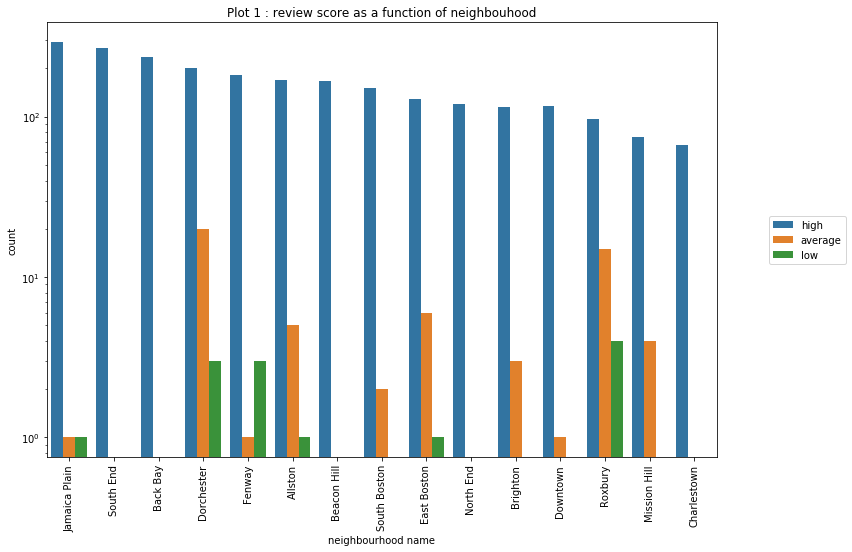

In [52]:
neighbourhood_list = ['Jamaica Plain', 'South End', 'Back Bay', 'Dorchester', 'Fenway','Allston', 'Beacon Hill',
                      'South Boston', 'East Boston', 'North End','Brighton', 'Downtown', 'Roxbury', 'Mission Hill',
                      'Charlestown']

plt.figure(figsize=(12,8))

sns.countplot(boston_location_df[boston_location_df['neighbourhood_cleansed'].isin(neighbourhood_list)]['neighbourhood_cleansed'], 
              hue=boston_location_df['review_groups_location'],
              order = neighbourhood_list)
plt.xlabel('neighbourhood name')
plt.xticks(rotation=90)
plt.title('Plot 1 : review score as a function of neighbouhood')
plt.yscale('log')
plt.legend(loc='center right', bbox_to_anchor=(1.2,0.5))

Although in most of the cases neighbouhoods with highest listings have high scores, some of them (e.g. 'Dorchester', 'Roxbury', 'Fenway') have non negligible amount of average or low scores. 

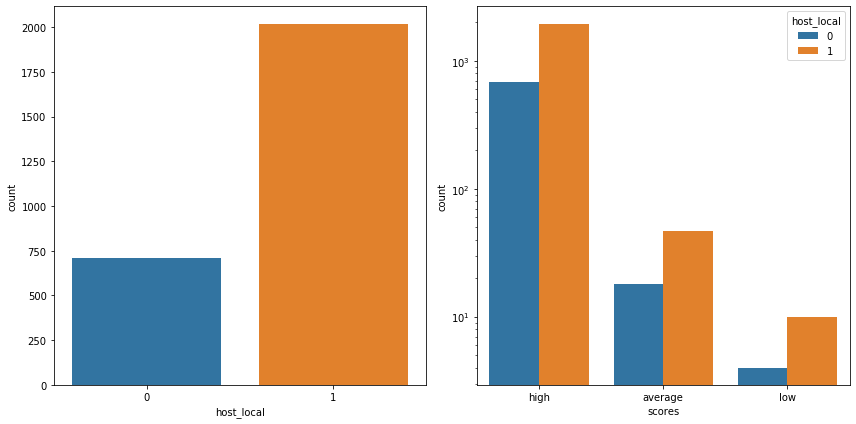

In [53]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.countplot('host_local', data=boston_location_df, ax=ax[0])
sns.countplot('review_groups_location', hue='host_local', data=boston_location_df, ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_xlabel('scores')
fig.tight_layout()

So **most of the hosts are local**. For both local and non-local hosts, 'high' score group dominates over others.

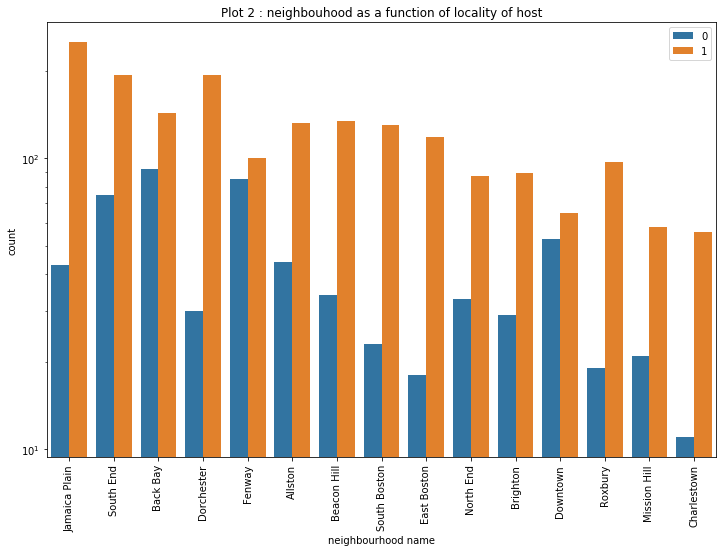

In [54]:
plt.figure(figsize=(12,8))

sns.countplot(boston_location_df[boston_location_df['neighbourhood_cleansed'].isin(neighbourhood_list)]['neighbourhood_cleansed'], 
              hue=boston_location_df['host_local'],order = neighbourhood_list)
plt.xlabel('neighbourhood name')
plt.xticks(rotation=90)
plt.title('Plot 2 : neighbouhood as a function of locality of host')
plt.yscale('log')
plt.legend(loc='best')

Some of the interesting points to note :

1. Although neighbourhoods like 'South End', 'Back Bay' have large number of non-local hosts, they have only high ratings (Plot 1).
2. 'Fenway' has a comparable number of local and non-local hosts but high score group dominates over the rest.

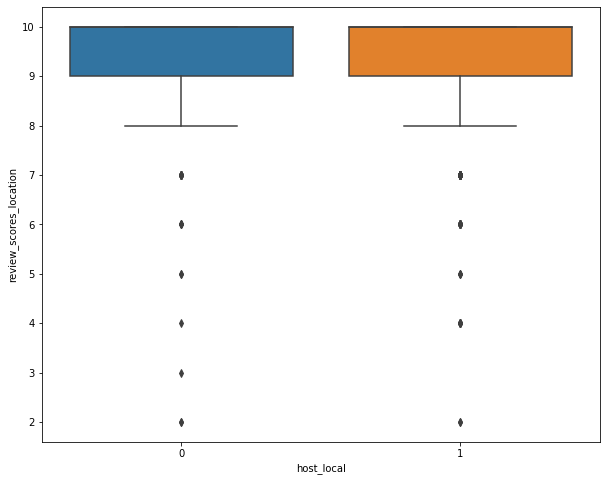

In [55]:
plt.figure(figsize=(10,8))
sns.boxplot(x='host_local', y='review_scores_location', data=boston_location_df)

Both the local and non-local hosts have nearly identical score distributions.

In [56]:
boston_location_df.columns

Index(['neighbourhood_cleansed', 'zipcode', 'calculated_host_listings_count',
       'latitude', 'longitude', 'is_location_exact', 'review_scores_location',
       'host_local', 'review_groups_location'],
      dtype='object')

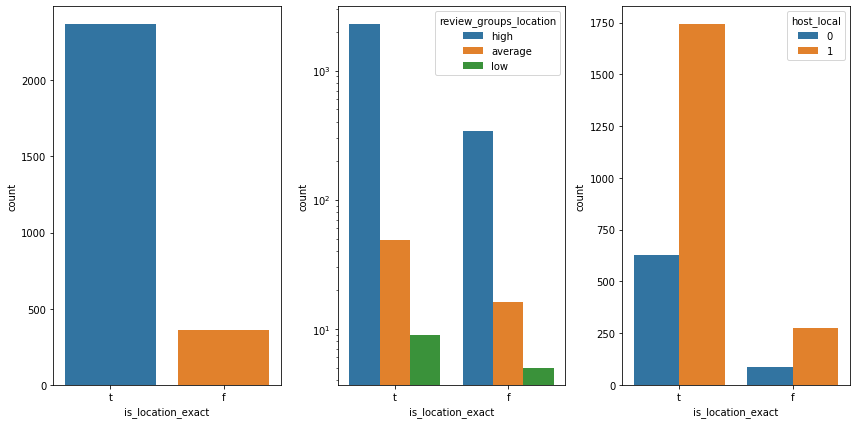

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))
sns.countplot('is_location_exact', data=boston_location_df, ax=ax[0])
sns.countplot('is_location_exact', hue='review_groups_location', data=boston_location_df, ax=ax[1])
sns.countplot('is_location_exact', hue='host_local', data=boston_location_df, ax=ax[2])
ax[1].set_yscale('log')
fig.tight_layout()

Total number of listings with exact location belonging to high score group is higher then listings with no exact location. Also both local and non-local hosts have more number of listings with exact locations.

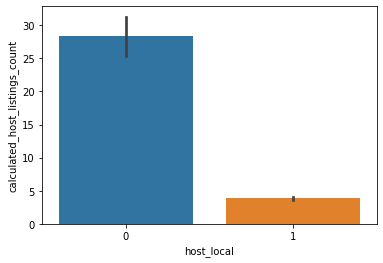

In [58]:
sns.barplot(x='host_local', y='calculated_host_listings_count', data=boston_location_df)

Non-local hosts have larger number of listings as compared to local hosts. Well that is not surprising! You are more likely to give your house on rent if you are living outside the city.

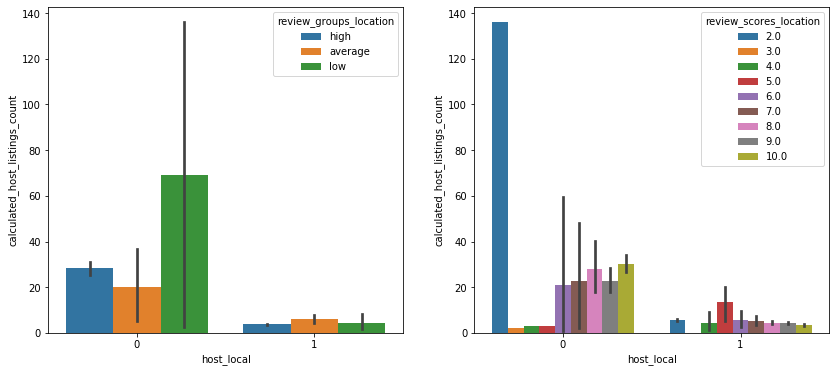

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(x='host_local', y='calculated_host_listings_count', hue='review_groups_location', data=boston_location_df, ax=ax[0])
sns.barplot(x='host_local', y='calculated_host_listings_count', hue='review_scores_location', data=boston_location_df, ax=ax[1])

From the above plots it is evident that non-local hosts have maximum of the listings with low scores whereas average score is more common in case of listings of the local hosts

**Question 2** : What causes a property to cost more than others?

Let's start with the following features.

In [60]:
boston_price_df = boston_df[['host_verifications', 'host_identity_verified', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'calculated_host_listings_count',
       'price']]

Let's first calculate percentage of NULL values in each feature.

In [61]:
boston_price_df.isnull().sum().sort_values()/len(boston_price_df)

host_verifications                0.000000
host_identity_verified            0.000000
room_type                         0.000000
accommodates                      0.000000
bed_type                          0.000000
amenities                         0.000000
calculated_host_listings_count    0.000000
price                             0.000000
property_type                     0.000837
beds                              0.002510
bedrooms                          0.002789
bathrooms                         0.003905
square_feet                       0.984379
dtype: float64

Except 'square_feet' which has almost 98% of it's value as NULL, rest of the features either have no or very few NULL values.

In [156]:
#boston_price_df['host_verifications'].unique()

In [157]:
#boston_price_df['host_identity_verified'].value_counts()

In [62]:
boston_price_df[['host_verifications', 'host_identity_verified']].head()

,host_verifications,host_identity_verified
0,"['email', 'phone', 'facebook', 'reviews']",f
1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t
2,"['email', 'phone', 'reviews', 'jumio']",t
3,"['email', 'phone', 'reviews']",f
4,"['email', 'phone', 'reviews', 'kba']",t


'host_verifications' contains several platforms on which the identity of a particular host can be verified whereas 'host_identity_verified' represents either the identity of a host has been verified or not. For a customer, the later feature is more important than the former one. Let's just drop the column 'host_verifications'.

In [63]:
boston_price_df.drop('host_verifications', axis=1, inplace=True)

/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
boston_price_df['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [65]:
boston_price_df['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

In [66]:
boston_price_df['bed_type'].value_counts()

Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64

In [67]:
for items in boston_price_df['amenities'].values[:5]:
    print(items)
    print('\n')

{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}


{TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Pets Allowed","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"Lock on Bedroom Door",Hangers,"Hair Dryer",Iron}


{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card",Essentials,Shampoo,"Lock on Bedroom Door","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}


{TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Gym,Breakfast,"Indoor Fireplace",Heating,Washer,Dryer,"Smoke Detector","Carbon M

In [68]:
boston_price_df['amenities'].nunique()

3092

So the feature 'amenities' basically enlists all the facilites provided to guests. It has 3092 unique values! It is nearly impossible to deal with so many different categories. Instead it might be useful to calculate how many amenities does a particular property offer to it's guests. 